In [57]:
#201711013 - THAKER VANDAN BHARAT
import numpy as np
import pandas as pd
import csv
import surprise
import time
import sklearn.preprocessing as prepro
from surprise import SVD
from surprise import NormalPredictor
from surprise import Dataset
from surprise import Reader
from surprise.model_selection import cross_validate

In [58]:
class MatrixFacto(surprise.AlgoBase):
    '''A basic rating prediction algorithm based on matrix factorization.'''
    skip_train=0
    
    def __init__(self, learning_rate, n_epochs, n_factors):
        
        self.lr = learning_rate  # learning rate for SGD
        self.n_epochs = n_epochs  # number of iterations of SGD
        self.n_factors = n_factors  # number of factors
        
    def train(self, trainset):
        '''Learn the vectors p_u and q_i with SGD'''
        
        print('Fitting data with SGD...')
        
        # Randomly initialize the user and item factors.
        p = np.random.normal(0, .1, (trainset.n_users, self.n_factors))
        q = np.random.normal(0, .1, (trainset.n_items, self.n_factors))
        
        # SGD procedure
        for _ in range(self.n_epochs):
            for u, i, r_ui in trainset.all_ratings():
                err = r_ui - np.dot(p[u], q[i])
                # Update vectors p_u and q_i
                p[u] += self.lr * err * q[i]
                q[i] += self.lr * err * p[u]
                # Note: in the update of q_i, we should actually use the previous (non-updated) value of p_u.
                # In practice it makes almost no difference.
        
        self.p, self.q = p, q
        self.trainset = trainset

    def estimate(self, u, i):
        '''Return the estmimated rating of user u for item i.'''
        
        # return scalar product between p_u and q_i if user and item are known,
        # else return the average of all ratings
        if self.trainset.knows_user(u) and self.trainset.knows_item(i):
            return np.dot(self.p[u], self.q[i])
        else:
            return self.trainset.global_mean

In [59]:
time_taken1 = [] #200K
time_taken2 = [] #400K
time_taken3 = [] #700K
time_taken4 = [] #1million

In [60]:
#Matrix Facto - 200K
start_time1 = time.time()
ratings_dataFrame1 = pd.read_csv('ratings - 1_200K.csv', dtype={'rating': float})
reader = Reader(rating_scale=(1, 5))
# print (ratings_dataFrame1.head(10))
data = Dataset.load_from_df(ratings_dataFrame1[['user_id', 'book_id', 'rating']], reader)
data.split(2)
# cross_validate(NormalPredictor(), data, cv=2)
# algo = SVD()
# cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)
# R_df=ratings_dataFrame.pivot(index='user_id', columns='book_id', values='rating').fillna(0)
# print(ratings_dataFrame)
# ratings_matrix = R_df.as_matrix()
# print(ratings_matrix.shape)

algo = MatrixFacto(learning_rate=.01, n_epochs=10, n_factors=10)
result1 = surprise.evaluate(algo, data, measures=['RMSE'])
end_time1 = time.time() - start_time1
time_taken1.append(end_time1)
print("--- %s seconds ---" % (end_time1))

C:\Anaconda3\lib\site-packages\surprise\evaluate.py:66: UserWarning: The evaluate() method is deprecated. Please use model_selection.cross_validate() instead.
  'model_selection.cross_validate() instead.', UserWarning)
C:\Anaconda3\lib\site-packages\surprise\dataset.py:193: UserWarning: Using data.split() or using load_from_folds() without using a CV iterator is now deprecated. 
  UserWarning)


Evaluating RMSE of algorithm MatrixFacto.

------------
Fold 1
Fitting data with SGD...
RMSE: 1.0409
------------
Fold 2
Fitting data with SGD...
RMSE: 1.0361
------------
------------
Mean RMSE: 1.0385
------------
------------
--- 23.312889337539673 seconds ---


In [61]:
#SVD - 200K
start_time2 = time.time()
ratings_dataFrame2 = pd.read_csv('ratings - 1_200K.csv', dtype={'rating': float})
reader = Reader(rating_scale=(1, 5))
# print (ratings_dataFrame2.head(10))
data = Dataset.load_from_df(ratings_dataFrame2[['user_id', 'book_id', 'rating']], reader)
data.split(2)
algo = surprise.SVD()
result2 = surprise.evaluate(algo, data, measures=['RMSE'])
end_time2 = time.time() - start_time2
time_taken1.append(end_time2)
print("--- %s seconds ---" % (end_time2))

C:\Anaconda3\lib\site-packages\surprise\evaluate.py:66: UserWarning: The evaluate() method is deprecated. Please use model_selection.cross_validate() instead.
  'model_selection.cross_validate() instead.', UserWarning)
C:\Anaconda3\lib\site-packages\surprise\dataset.py:193: UserWarning: Using data.split() or using load_from_folds() without using a CV iterator is now deprecated. 
  UserWarning)


Evaluating RMSE of algorithm SVD.

------------
Fold 1
RMSE: 0.8970
------------
Fold 2
RMSE: 0.8956
------------
------------
Mean RMSE: 0.8963
------------
------------
--- 18.909412145614624 seconds ---


In [62]:
#K-NN - 200K
start_time3 = time.time()
ratings_dataFrame3 = pd.read_csv('ratings - 1_200K.csv', dtype={'rating': float})
reader = Reader(rating_scale=(1, 5))
# print (ratings_dataFrame3.head(10))
data = Dataset.load_from_df(ratings_dataFrame3[['user_id', 'book_id', 'rating']], reader)
data.split(2)
algo = surprise.KNNBasic()
result3 = surprise.evaluate(algo, data, measures=['RMSE'])
end_time3 = time.time() - start_time3
time_taken1.append(end_time3)
print("--- %s seconds ---" % (end_time3))

C:\Anaconda3\lib\site-packages\surprise\evaluate.py:66: UserWarning: The evaluate() method is deprecated. Please use model_selection.cross_validate() instead.
  'model_selection.cross_validate() instead.', UserWarning)
C:\Anaconda3\lib\site-packages\surprise\dataset.py:193: UserWarning: Using data.split() or using load_from_folds() without using a CV iterator is now deprecated. 
  UserWarning)


Evaluating RMSE of algorithm KNNBasic.

------------
Fold 1
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9512
------------
Fold 2
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9500
------------
------------
Mean RMSE: 0.9506
------------
------------
--- 33.70309114456177 seconds ---


In [63]:
#Matrix Facto - 400K
start_time4 = time.time()
ratings_dataFrame4 = pd.read_csv('ratings - 2_400K.csv', dtype={'rating': float})
reader = Reader(rating_scale=(1, 5))
#print (ratings_dataFrame4.head(10))
data = Dataset.load_from_df(ratings_dataFrame4[['user_id', 'book_id', 'rating']], reader)
data.split(2)
algo = MatrixFacto(learning_rate=.01, n_epochs=10, n_factors=10)
result4 = surprise.evaluate(algo, data, measures=['RMSE'])
end_time4 = time.time() - start_time4
time_taken2.append(end_time4)
print("--- %s seconds ---" % (end_time4))

C:\Anaconda3\lib\site-packages\surprise\evaluate.py:66: UserWarning: The evaluate() method is deprecated. Please use model_selection.cross_validate() instead.
  'model_selection.cross_validate() instead.', UserWarning)
C:\Anaconda3\lib\site-packages\surprise\dataset.py:193: UserWarning: Using data.split() or using load_from_folds() without using a CV iterator is now deprecated. 
  UserWarning)


Evaluating RMSE of algorithm MatrixFacto.

------------
Fold 1
Fitting data with SGD...
RMSE: 0.9655
------------
Fold 2
Fitting data with SGD...
RMSE: 0.9626
------------
------------
Mean RMSE: 0.9640
------------
------------
--- 47.0447518825531 seconds ---


In [64]:
#SVD - 400K
start_time5 = time.time()
ratings_dataFrame5 = pd.read_csv('ratings - 2_400K.csv', dtype={'rating': float})
reader = Reader(rating_scale=(1, 5))
# print (ratings_dataFrame5.head(10))
data = Dataset.load_from_df(ratings_dataFrame5[['user_id', 'book_id', 'rating']], reader)
data.split(2)
algo = surprise.SVD()
result5 = surprise.evaluate(algo, data, measures=['RMSE'])
end_time5 = time.time() - start_time5
time_taken2.append(end_time5)
print("--- %s seconds ---" % (end_time5))

C:\Anaconda3\lib\site-packages\surprise\evaluate.py:66: UserWarning: The evaluate() method is deprecated. Please use model_selection.cross_validate() instead.
  'model_selection.cross_validate() instead.', UserWarning)
C:\Anaconda3\lib\site-packages\surprise\dataset.py:193: UserWarning: Using data.split() or using load_from_folds() without using a CV iterator is now deprecated. 
  UserWarning)


Evaluating RMSE of algorithm SVD.

------------
Fold 1
RMSE: 0.8945
------------
Fold 2
RMSE: 0.8931
------------
------------
Mean RMSE: 0.8938
------------
------------
--- 37.592427015304565 seconds ---


In [65]:
#K-NN - 400K
start_time6 = time.time()
ratings_dataFrame6 = pd.read_csv('ratings - 2_400K.csv', dtype={'rating': float})
reader = Reader(rating_scale=(1, 5))
# print (ratings_dataFrame6.head(10))
data = Dataset.load_from_df(ratings_dataFrame6[['user_id', 'book_id', 'rating']], reader)
data.split(2)
algo = surprise.KNNBasic()
result6 = surprise.evaluate(algo, data, measures=['RMSE'])
end_time6 = time.time() - start_time6
time_taken2.append(end_time6)
print("--- %s seconds ---" % (end_time6))

C:\Anaconda3\lib\site-packages\surprise\evaluate.py:66: UserWarning: The evaluate() method is deprecated. Please use model_selection.cross_validate() instead.
  'model_selection.cross_validate() instead.', UserWarning)
C:\Anaconda3\lib\site-packages\surprise\dataset.py:193: UserWarning: Using data.split() or using load_from_folds() without using a CV iterator is now deprecated. 
  UserWarning)


Evaluating RMSE of algorithm KNNBasic.

------------
Fold 1
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9343
------------
Fold 2
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9352
------------
------------
Mean RMSE: 0.9348
------------
------------
--- 104.50461554527283 seconds ---


In [66]:
#Matrix Facto - 700K
start_time7 = time.time()
ratings_dataFrame7 = pd.read_csv('ratings - 3_700K.csv', dtype={'rating': float})
reader = Reader(rating_scale=(1, 5))
#print (ratings_dataFrame7.head(10))
data = Dataset.load_from_df(ratings_dataFrame7[['user_id', 'book_id', 'rating']], reader)
data.split(2)
algo = MatrixFacto(learning_rate=.01, n_epochs=10, n_factors=10)
result7 = surprise.evaluate(algo, data, measures=['RMSE'])
end_time7 = time.time() - start_time7
time_taken3.append(end_time7)
print("--- %s seconds ---" % (end_time7))

C:\Anaconda3\lib\site-packages\surprise\evaluate.py:66: UserWarning: The evaluate() method is deprecated. Please use model_selection.cross_validate() instead.
  'model_selection.cross_validate() instead.', UserWarning)
C:\Anaconda3\lib\site-packages\surprise\dataset.py:193: UserWarning: Using data.split() or using load_from_folds() without using a CV iterator is now deprecated. 
  UserWarning)


Evaluating RMSE of algorithm MatrixFacto.

------------
Fold 1
Fitting data with SGD...
RMSE: 0.9415
------------
Fold 2
Fitting data with SGD...
RMSE: 0.9494
------------
------------
Mean RMSE: 0.9454
------------
------------
--- 83.95621871948242 seconds ---


In [67]:
#SVD - 700K
start_time8 = time.time()
ratings_dataFrame8 = pd.read_csv('ratings - 3_700K.csv', dtype={'rating': float})
reader = Reader(rating_scale=(1, 5))
# print (ratings_dataFrame8.head(10))
data = Dataset.load_from_df(ratings_dataFrame8[['user_id', 'book_id', 'rating']], reader)
data.split(2)
algo = surprise.SVD()
result8 = surprise.evaluate(algo, data, measures=['RMSE'])
end_time8 = time.time() - start_time8
time_taken3.append(end_time8)
print("--- %s seconds ---" % (end_time8))

C:\Anaconda3\lib\site-packages\surprise\evaluate.py:66: UserWarning: The evaluate() method is deprecated. Please use model_selection.cross_validate() instead.
  'model_selection.cross_validate() instead.', UserWarning)
C:\Anaconda3\lib\site-packages\surprise\dataset.py:193: UserWarning: Using data.split() or using load_from_folds() without using a CV iterator is now deprecated. 
  UserWarning)


Evaluating RMSE of algorithm SVD.

------------
Fold 1
RMSE: 0.8974
------------
Fold 2
RMSE: 0.9001
------------
------------
Mean RMSE: 0.8988
------------
------------
--- 65.96540594100952 seconds ---


In [68]:
#K-NN - 700K
start_time9 = time.time()
ratings_dataFrame9 = pd.read_csv('ratings - 3_700K.csv', dtype={'rating': float})
reader = Reader(rating_scale=(1, 5))
# print (ratings_dataFrame9.head(10))
data = Dataset.load_from_df(ratings_dataFrame6[['user_id', 'book_id', 'rating']], reader)
data.split(2)
algo = surprise.KNNBasic()
result9 = surprise.evaluate(algo, data, measures=['RMSE'])
end_time9 = time.time() - start_time9
time_taken3.append(end_time9)
print("--- %s seconds ---" % (end_time9))

C:\Anaconda3\lib\site-packages\surprise\evaluate.py:66: UserWarning: The evaluate() method is deprecated. Please use model_selection.cross_validate() instead.
  'model_selection.cross_validate() instead.', UserWarning)
C:\Anaconda3\lib\site-packages\surprise\dataset.py:193: UserWarning: Using data.split() or using load_from_folds() without using a CV iterator is now deprecated. 
  UserWarning)


Evaluating RMSE of algorithm KNNBasic.

------------
Fold 1
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9352
------------
Fold 2
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9327
------------
------------
Mean RMSE: 0.9339
------------
------------
--- 107.59205913543701 seconds ---


In [69]:
#Matrix Facto - 1million
start_time10 = time.time()
ratings_dataFrame10 = pd.read_csv('ratings_1million.csv', dtype={'rating': float})
reader = Reader(rating_scale=(1, 5))
#print (ratings_dataFrame10.head(10))
data = Dataset.load_from_df(ratings_dataFrame10[['user_id', 'book_id', 'rating']], reader)
data.split(2)
algo = MatrixFacto(learning_rate=.01, n_epochs=10, n_factors=10)
result10 = surprise.evaluate(algo, data, measures=['RMSE'])
end_time10 = time.time() - start_time10
time_taken4.append(end_time10)
print("--- %s seconds ---" % (end_time10))

C:\Anaconda3\lib\site-packages\surprise\evaluate.py:66: UserWarning: The evaluate() method is deprecated. Please use model_selection.cross_validate() instead.
  'model_selection.cross_validate() instead.', UserWarning)
C:\Anaconda3\lib\site-packages\surprise\dataset.py:193: UserWarning: Using data.split() or using load_from_folds() without using a CV iterator is now deprecated. 
  UserWarning)


Evaluating RMSE of algorithm MatrixFacto.

------------
Fold 1
Fitting data with SGD...
RMSE: 0.9338
------------
Fold 2
Fitting data with SGD...
RMSE: 0.9317
------------
------------
Mean RMSE: 0.9328
------------
------------
--- 128.79689979553223 seconds ---


In [70]:
#SVD - 1million
start_time11 = time.time()
ratings_dataFrame11 = pd.read_csv('ratings_1million.csv', dtype={'rating': float})
reader = Reader(rating_scale=(1, 5))
# print (ratings_dataFrame11.head(10))
data = Dataset.load_from_df(ratings_dataFrame11[['user_id', 'book_id', 'rating']], reader)
data.split(2)
algo = surprise.SVD()
result11 = surprise.evaluate(algo, data, measures=['RMSE'])
end_time11 = time.time() - start_time11
time_taken4.append(end_time11)
print("--- %s seconds ---" % (end_time11))

C:\Anaconda3\lib\site-packages\surprise\evaluate.py:66: UserWarning: The evaluate() method is deprecated. Please use model_selection.cross_validate() instead.
  'model_selection.cross_validate() instead.', UserWarning)
C:\Anaconda3\lib\site-packages\surprise\dataset.py:193: UserWarning: Using data.split() or using load_from_folds() without using a CV iterator is now deprecated. 
  UserWarning)


Evaluating RMSE of algorithm SVD.

------------
Fold 1
RMSE: 0.8917
------------
Fold 2
RMSE: 0.8909
------------
------------
Mean RMSE: 0.8913
------------
------------
--- 99.37897658348083 seconds ---


In [71]:
#K-NN - 1million
start_time12 = time.time()
ratings_dataFrame12 = pd.read_csv('ratings_1million.csv', dtype={'rating': float})
reader = Reader(rating_scale=(1, 5))
# print (ratings_dataFrame12.head(10))
data = Dataset.load_from_df(ratings_dataFrame12[['user_id', 'book_id', 'rating']], reader)
data.split(2)
algo = surprise.KNNBasic()
result12 = surprise.evaluate(algo, data, measures=['RMSE'])
end_time12 = time.time() - start_time12
time_taken4.append(end_time12)
print("--- %s seconds ---" % (end_time12))

C:\Anaconda3\lib\site-packages\surprise\evaluate.py:66: UserWarning: The evaluate() method is deprecated. Please use model_selection.cross_validate() instead.
  'model_selection.cross_validate() instead.', UserWarning)
C:\Anaconda3\lib\site-packages\surprise\dataset.py:193: UserWarning: Using data.split() or using load_from_folds() without using a CV iterator is now deprecated. 
  UserWarning)


Evaluating RMSE of algorithm KNNBasic.

------------
Fold 1
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9268
------------
Fold 2
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9256
------------
------------
Mean RMSE: 0.9262
------------
------------
--- 578.5345304012299 seconds ---


In [72]:
print(time_taken1)
print(time_taken2)
print(time_taken3)
print(time_taken4)

[23.312889337539673, 18.909412145614624, 33.70309114456177]
[47.0447518825531, 37.592427015304565, 104.50461554527283]
[83.95621871948242, 65.96540594100952, 107.59205913543701]
[128.79689979553223, 99.37897658348083, 578.5345304012299]


In [75]:
import matplotlib.pyplot as plt

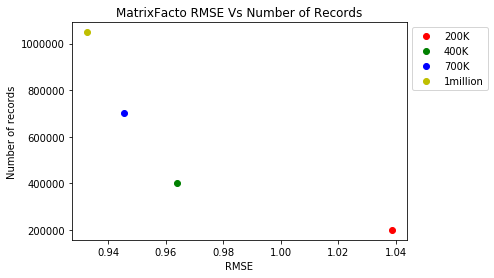

In [101]:
#rmse plot - Matrix Facto
y = [len(ratings_dataFrame1),len(ratings_dataFrame4),len(ratings_dataFrame7),len(ratings_dataFrame10)]
plt.plot( np.mean(result1['rmse']),y[0],'ro',label='200K')
plt.plot( np.mean(result4['rmse']),y[1],'go',label='400K')
plt.plot( np.mean(result7['rmse']),y[2],'bo',label='700K')
plt.plot( np.mean(result10['rmse']),y[3],'yo',label='1million')
legend = plt.legend(loc='upper left',bbox_to_anchor=(1, 1))
frame = legend.get_frame()
plt.xlabel('RMSE')
plt.ylabel('Number of records')
plt.title('MatrixFacto RMSE Vs Number of Records')
plt.show()

Text(0.5,1,'MatrixFacto Time Vs Number of Records')

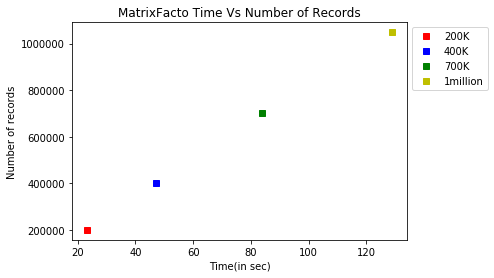

In [102]:
#time plot - Matrix Facto
y = [len(ratings_dataFrame1),len(ratings_dataFrame4),len(ratings_dataFrame7),len(ratings_dataFrame10)]
plt.plot( time_taken1[0],y[0],'rs',label='200K')
plt.plot( time_taken2[0], y[1],'bs',label='400K')
plt.plot( time_taken3[0],y[2],'gs',label='700K')
plt.plot( time_taken4[0], y[3],'ys',label='1million')
legend = plt.legend(loc='upper left',bbox_to_anchor=(1, 1))
frame = legend.get_frame()
plt.xlabel('Time(in sec)')
plt.ylabel('Number of records')
plt.title('MatrixFacto Time Vs Number of Records')

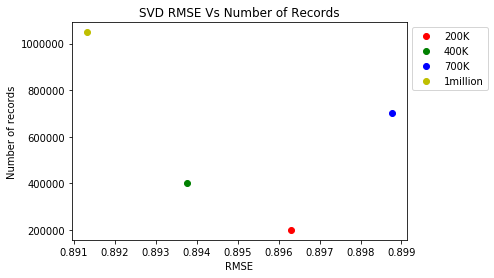

In [103]:
#rmse plot - SVD
y = [len(ratings_dataFrame2),len(ratings_dataFrame5),len(ratings_dataFrame8),len(ratings_dataFrame11)]
plt.plot( np.mean(result2['rmse']),y[0],'ro',label='200K')
plt.plot( np.mean(result5['rmse']),y[1],'go',label='400K')
plt.plot( np.mean(result8['rmse']),y[2],'bo',label='700K')
plt.plot( np.mean(result11['rmse']),y[3],'yo',label='1million')
legend = plt.legend(loc='upper left',bbox_to_anchor=(1, 1))
frame = legend.get_frame()
plt.xlabel('RMSE')
plt.ylabel('Number of records')
plt.title('SVD RMSE Vs Number of Records')
plt.show()

Text(0.5,1,'SVD Time Vs Number of Records')

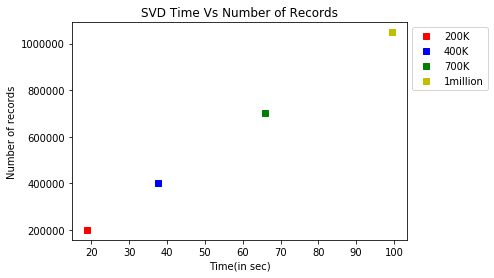

In [104]:
#time plot - SVD
y = [len(ratings_dataFrame2),len(ratings_dataFrame5),len(ratings_dataFrame8),len(ratings_dataFrame11)]
plt.plot( time_taken1[1],y[0],'rs',label='200K')
plt.plot( time_taken2[1], y[1],'bs',label='400K')
plt.plot( time_taken3[1],y[2],'gs',label='700K')
plt.plot( time_taken4[1], y[3],'ys',label='1million')
legend = plt.legend(loc='upper left',bbox_to_anchor=(1, 1))
frame = legend.get_frame()
plt.xlabel('Time(in sec)')
plt.ylabel('Number of records')
plt.title('SVD Time Vs Number of Records')

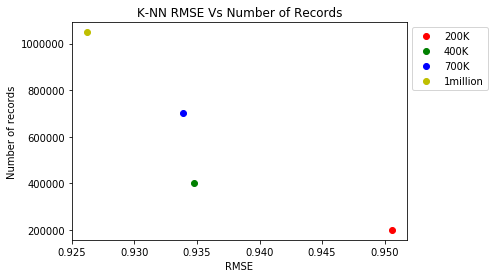

In [105]:
#rmse plot - K-NN
y = [len(ratings_dataFrame3),len(ratings_dataFrame6),len(ratings_dataFrame9),len(ratings_dataFrame12)]
plt.plot( np.mean(result3['rmse']),y[0],'ro',label='200K')
plt.plot( np.mean(result6['rmse']),y[1],'go',label='400K')
plt.plot( np.mean(result9['rmse']),y[2],'bo',label='700K')
plt.plot( np.mean(result12['rmse']),y[3],'yo',label='1million')
legend = plt.legend(loc='upper left',bbox_to_anchor=(1, 1))
frame = legend.get_frame()
plt.xlabel('RMSE')
plt.ylabel('Number of records')
plt.title('K-NN RMSE Vs Number of Records')
plt.show()

Text(0.5,1,'K-NN Time Vs Number of Records')

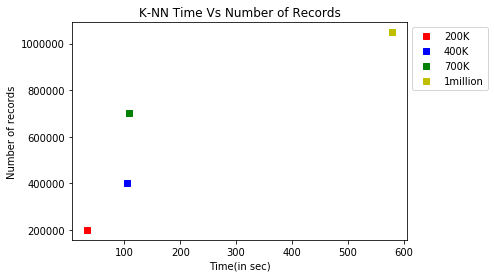

In [106]:
#time plot - K-NN
y = [len(ratings_dataFrame3),len(ratings_dataFrame6),len(ratings_dataFrame9),len(ratings_dataFrame12)]
plt.plot( time_taken1[2],y[0],'rs',label='200K')
plt.plot( time_taken2[2], y[1],'bs',label='400K')
plt.plot( time_taken3[2],y[2],'gs',label='700K')
plt.plot( time_taken4[2], y[3],'ys',label='1million')
legend = plt.legend(loc='upper left',bbox_to_anchor=(1, 1))
frame = legend.get_frame()
plt.xlabel('Time(in sec)')
plt.ylabel('Number of records')
plt.title('K-NN Time Vs Number of Records')